In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('spam_ham_dataset.csv')
df.sample(10)

,Unnamed: 0,label,text,label_num
3392,3077,ham,"Subject: hpl nom for april 19 , 2001\r\n( see ...",0
1365,2989,ham,Subject: re : noms / actual flow for 4 / 01 / ...,0
2410,1026,ham,Subject: nom change on texas eastern\r\n- - - ...,0
1084,427,ham,Subject: re : midcoast marketing\r\nthe deals ...,0
2918,898,ham,Subject: new su bridge\r\nsome people are havi...,0
2238,3099,ham,"Subject: hpl nom for april 21 - 23 , 2001\r\n(...",0
3368,4535,spam,Subject: hi !\r\nhi ! i am looking for new fri...,1
5169,1409,ham,Subject: industrial worksheets for august 2000...,0
851,4644,spam,"Subject: how to confidently attract , meet and...",1
3463,494,ham,Subject: methanol plant upset\r\nthe methanol ...,0


In [3]:
df.shape

(5171, 4)

In [4]:
# 1.Data Cleaning
# 2.EDA
# 3.Text Preprocessing
# 4.Model Building
# 5.Evaluation
# 6.Improvements
# 7.Website
# 8.Deployment

## 1. Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [6]:
#As we can see Unnamed:0 is not giving us any info so we can drop it
df.drop(columns=['Unnamed: 0'],inplace=True)

In [7]:
df.head()

,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [8]:
#Renaming the columns
df.rename(columns={'label_num':'target'},inplace=True)
df.sample(5)

,label,text,target
4371,ham,"Subject: well heads\r\ndaren , eog called and ...",0
1951,ham,"Subject: hpl nom for february 1 , 2001\r\n( se...",0
1828,ham,Subject: supply for midlothian\r\ndaren -\r\n-...,0
4185,ham,"Subject: hpl nom for april 5 , 2001\r\n( see a...",0
4677,ham,"Subject: pathing question\r\ndaren ,\r\ni have...",0


In [9]:
#Count of Each Category
df['target'].value_counts()

0    3672
1    1499
Name: target, dtype: int64

In [10]:
#As the dat is encoded where ham-->0 and spam-->1 we donot require to do any label encoding

In [11]:
#Checking Missing Values
df.isnull().sum()

label     0
text      0
target    0
dtype: int64

In [12]:
#Check for Duplicate value
df.duplicated().sum()

178

In [13]:
#Remove Duplicates
df=df.drop_duplicates(keep='first')


In [14]:
df.duplicated().sum()

0

In [15]:
df['target'].value_counts()

0    3531
1    1462
Name: target, dtype: int64

In [16]:
df.shape

(4993, 3)

## 2. EDA

In [17]:
df['target'].value_counts()

0    3531
1    1462
Name: target, dtype: int64

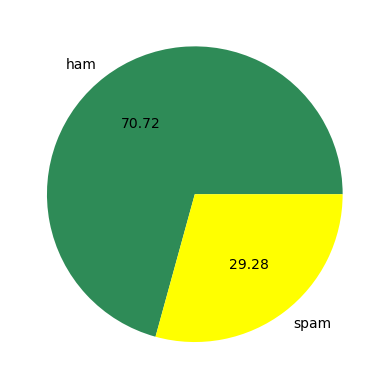

In [18]:
# Data Distribution
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f',colors=['seagreen','yellow'],)
plt.show()

In [19]:
#Data is somewhat imbalanced

In [20]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
df['num_characters']=df['text'].apply(len) #length of each sms according to each character

In [22]:
df.head()

,label,text,target,num_characters
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524
3,spam,"Subject: photoshop , windows , office . cheap ...",1,414
4,ham,Subject: re : indian springs\r\nthis deal is t...,0,336


In [23]:
#Number of Words
df['num_words']=df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [24]:
df.head()

,label,text,target,num_characters,num_words
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551
3,spam,"Subject: photoshop , windows , office . cheap ...",1,414,49
4,ham,Subject: re : indian springs\r\nthis deal is t...,0,336,71


In [25]:
#number of sentences
df['num_sent']=df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

,label,text,target,num_characters,num_words,num_sent
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,1
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,20
3,spam,"Subject: photoshop , windows , office . cheap ...",1,414,49,3
4,ham,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3


In [26]:
df[['num_characters','num_words','num_sent']].describe()

,num_characters,num_words,num_sent
count,4993.000000,4993.000000,4993.000000
mean,1069.426397,233.678149,10.202884
std,1547.863387,340.702932,22.003030
min,11.000000,2.000000,1.000000
25%,256.000000,55.000000,3.000000
50%,557.000000,125.000000,6.000000
75%,1262.000000,288.000000,12.000000
max,32258.000000,8863.000000,1163.000000


In [27]:
#ham msges
df[df['target']==0][['num_characters','num_words','num_sent']].describe()

,num_characters,num_words,num_sent
count,3531.000000,3531.000000,3531.000000
mean,994.939394,230.516001,8.804871
std,1402.785831,337.018933,22.303918
min,18.000000,3.000000,1.000000
25%,241.000000,53.000000,3.000000
50%,538.000000,128.000000,5.000000
75%,1253.500000,298.500000,10.000000
max,32258.000000,8863.000000,1163.000000


In [28]:
#spam msges
df[df['target']==1][['num_characters','num_words','num_sent']].describe()

,num_characters,num_words,num_sent
count,1462.000000,1462.000000,1462.000000
mean,1249.326265,241.315321,13.579343
std,1840.112883,349.439381,20.883535
min,11.000000,2.000000,1.000000
25%,304.250000,60.000000,3.000000
50%,589.000000,119.500000,8.000000
75%,1305.000000,252.750000,15.000000
max,22073.000000,3963.000000,331.000000


In [29]:
import seaborn as sns


<AxesSubplot:xlabel='num_characters', ylabel='Count'>

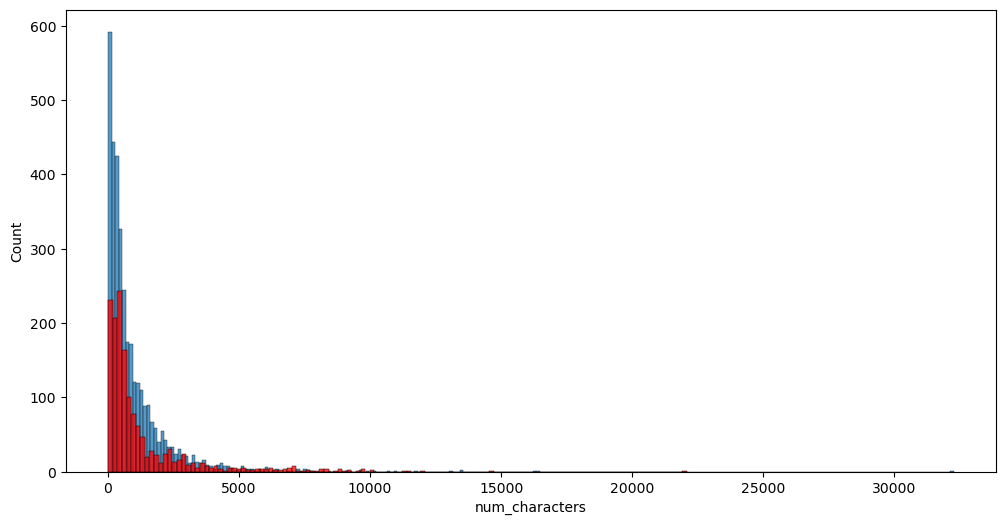

In [30]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

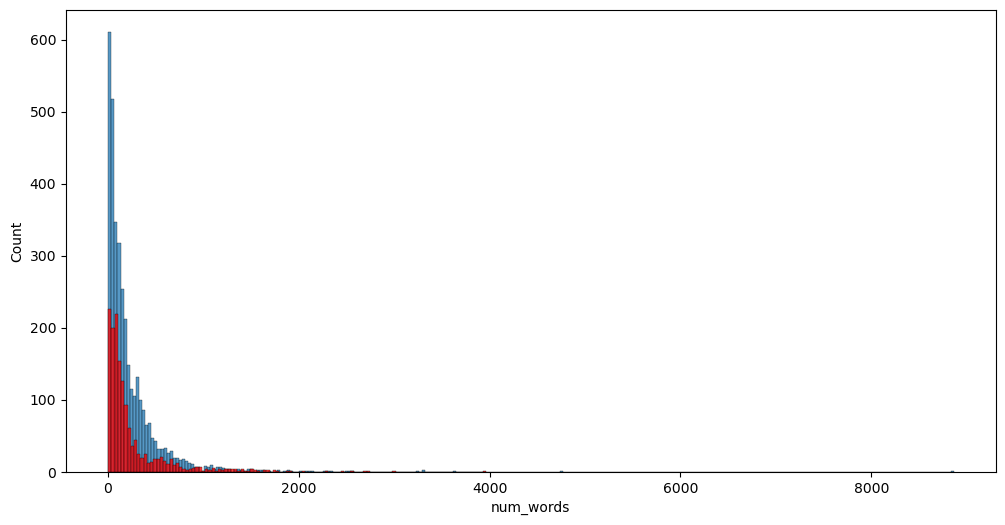

In [31]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

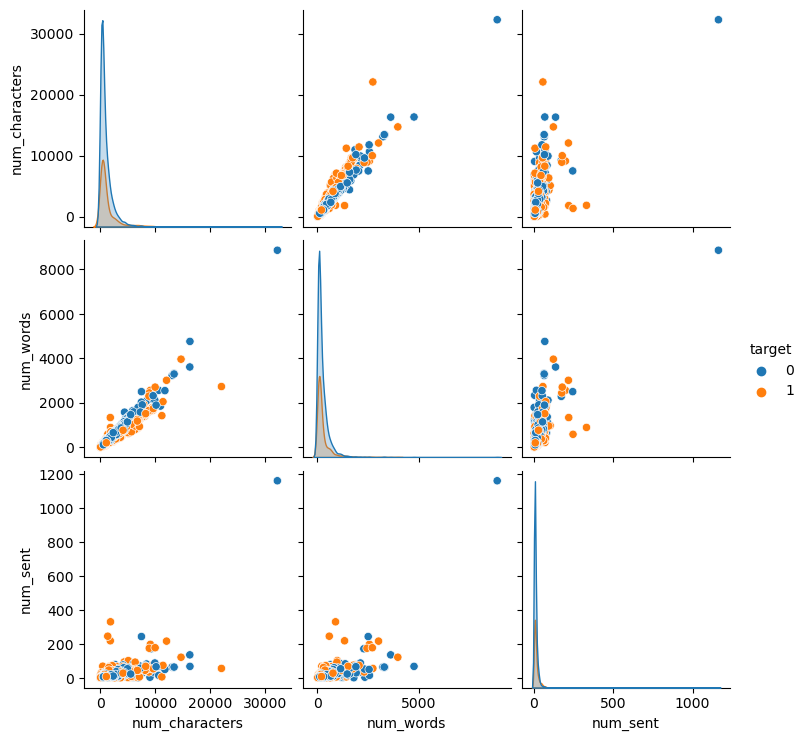

In [32]:
#Relatioship between columns
sns.pairplot(df,hue='target')

In [33]:
#Corelation
df.corr()

,target,num_characters,num_words,num_sent
target,1.000000,0.074794,0.014425,0.098752
num_characters,0.074794,1.000000,0.970492,0.655812
num_words,0.014425,0.970492,1.000000,0.717001
num_sent,0.098752,0.655812,0.717001,1.000000


<AxesSubplot:>

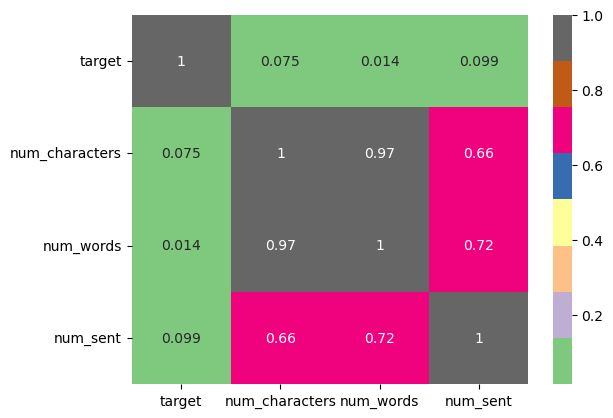

In [34]:
sns.heatmap(df.corr(),annot=True,cmap='Accent')

In [35]:
#From above heat map we got to know there is a strong relation between the 3 columns of 
#characters, words and sentence. So we'll keep only one column for and looking in the heatmap 
# we'll see that keeping num_sent is more sensible thing as it 0.99 (max) linear with target

## 3.Data Preprocessing
1. Lower case
2. Tokeniation
3. Removing Special Characters
4. Removing StopWords and Punctuation
5. Stemming

In [36]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
def transform_text(text):
    text=text.lower()  #Lower case
    text=nltk.word_tokenize(text)  #Tokeniation
    y=[]   
    for i in text:      #Removing Special Characters
        if i.isalnum():
            y.append(i)
    text=y.copy()  #Removing StopWords and Punctuation
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    ps=PorterStemmer()    #Stemming
    text=y.copy()
    y.clear()
    for i in text:
        y.append (ps.stem(i))
        
    return " ".join(y)

In [37]:
transform_text('Hi Ravisha! How was your day? Are you joining today?')

'hi ravisha day join today'

In [38]:
df['transformed_text']= df['text'].apply(transform_text)

In [39]:
df.head()

,label,text,target,num_characters,num_words,num_sent,transformed_text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3,subject enron methanol meter 988291 follow not...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,1,subject hpl nom januari 9 2001 see attach file...
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,20,subject neon retreat ho ho ho around wonder ti...
3,spam,"Subject: photoshop , windows , office . cheap ...",1,414,49,3,subject photoshop window offic cheap main tren...
4,ham,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3,subject indian spring deal book teco pvr reven...


In [40]:
#Forming word Cloud 
#spam msges
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [41]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=''))

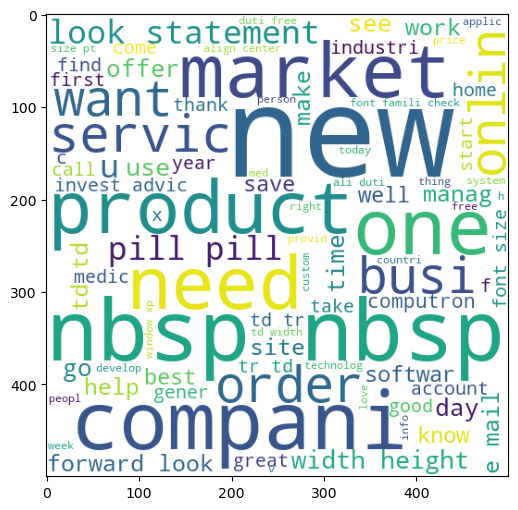

In [42]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

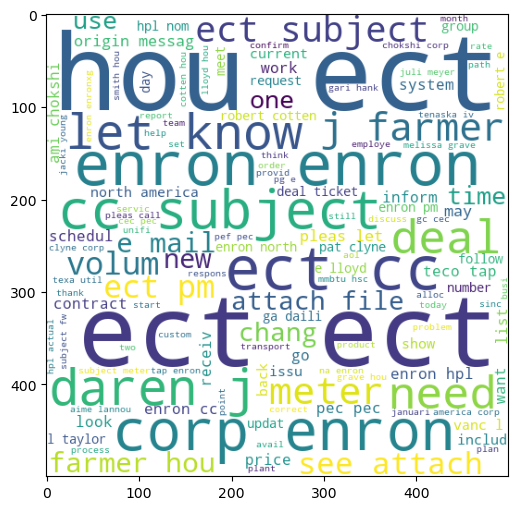

In [43]:
#Forming word Cloud 
#spam msges
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=''))
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [44]:
#Top 30 words in spam and ham
df.head()

,label,text,target,num_characters,num_words,num_sent,transformed_text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3,subject enron methanol meter 988291 follow not...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,1,subject hpl nom januari 9 2001 see attach file...
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,20,subject neon retreat ho ho ho around wonder ti...
3,spam,"Subject: photoshop , windows , office . cheap ...",1,414,49,3,subject photoshop window offic cheap main tren...
4,ham,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3,subject indian spring deal book teco pvr reven...


In [45]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [46]:
len(spam_corpus)

196592

In [47]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[('subject', 1622),
 ('3', 1229),
 ('com', 989),
 ('http', 981),
 ('compani', 918),
 ('2', 853),
 ('price', 731),
 ('1', 710),
 ('0', 688),
 ('e', 632),
 ('www', 586),
 ('inform', 553),
 ('00', 550),
 ('get', 547),
 ('font', 515),
 ('email', 509),
 ('5', 506),
 ('td', 504),
 ('pleas', 503),
 ('secur', 499),
 ('statement', 497),
 ('4', 493),
 ('invest', 473),
 ('stock', 467),
 ('us', 466),
 ('product', 459),
 ('7', 451),
 ('time', 448),
 ('new', 427),
 ('may', 421)]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


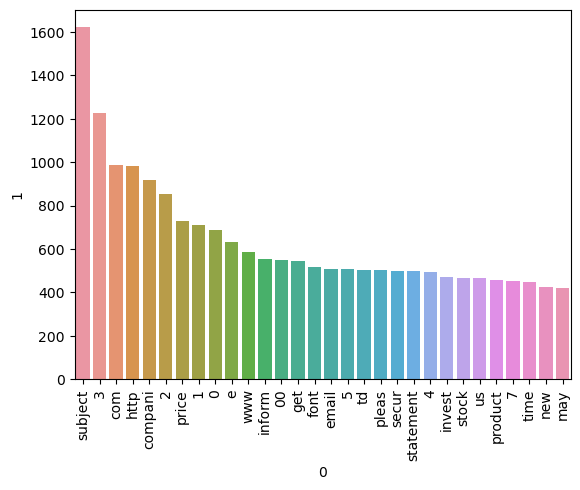

In [48]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [49]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [50]:
len(ham_corpus)

380475

In [51]:
Counter(ham_corpus).most_common(30)

[('ect', 13690),
 ('hou', 7174),
 ('enron', 6442),
 ('subject', 6210),
 ('2000', 4209),
 ('deal', 3481),
 ('ga', 2784),
 ('com', 2713),
 ('meter', 2709),
 ('pleas', 2675),
 ('cc', 2324),
 ('hpl', 2291),
 ('pm', 2283),
 ('thank', 2068),
 ('2001', 1988),
 ('1', 1971),
 ('000', 1854),
 ('daren', 1837),
 ('00', 1795),
 ('10', 1754),
 ('01', 1701),
 ('need', 1690),
 ('3', 1663),
 ('corp', 1662),
 ('volum', 1645),
 ('forward', 1571),
 ('2', 1504),
 ('know', 1405),
 ('mmbtu', 1396),
 ('e', 1333)]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


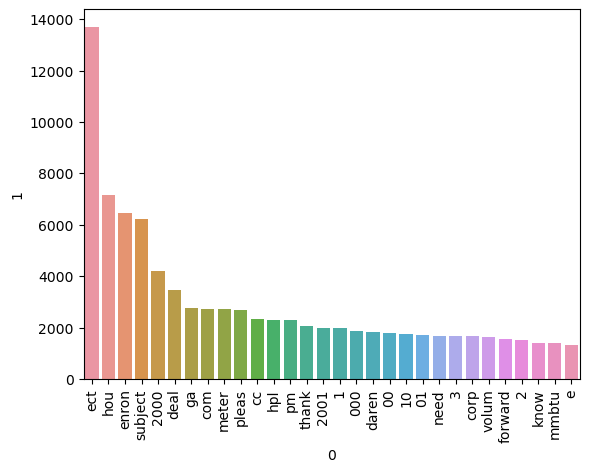

In [52]:
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## 4. Model Building

In [53]:
#Vectorizing the data using Bag of Words
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [54]:
X=cv.fit_transform(df['transformed_text']).toarray()

In [55]:
X.shape

(4993, 42592)

In [56]:
y=df['target'].values
y

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [58]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [59]:
gnb.fit(X_train,Y_train)
Y_pred1=gnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred1))
print(confusion_matrix(Y_test,Y_pred1))
print(precision_score(Y_test,Y_pred1))

0.9519519519519519
[[683  14]
 [ 34 268]]
0.950354609929078


In [60]:
mnb.fit(X_train,Y_train)
Y_pred2=mnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred2))
print(confusion_matrix(Y_test,Y_pred2))
print(precision_score(Y_test,Y_pred2))

0.970970970970971
[[680  17]
 [ 12 290]]
0.9446254071661238


In [61]:
bnb.fit(X_train,Y_train)
Y_pred3=bnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred3))
print(confusion_matrix(Y_test,Y_pred3))
print(precision_score(Y_test,Y_pred3))

0.8468468468468469
[[677  20]
 [133 169]]
0.8941798941798942


In [62]:
#Using TF-IDF
X=tfidf.fit_transform(df['transformed_text']).toarray()
X.shape

(4993, 3000)

In [63]:
y=df['target'].values
y

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [65]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [66]:
gnb.fit(X_train,Y_train)
Y_pred1=gnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred1))
print(confusion_matrix(Y_test,Y_pred1))
print(precision_score(Y_test,Y_pred1))

0.9579579579579579
[[678  19]
 [ 23 279]]
0.9362416107382551


In [67]:
mnb.fit(X_train,Y_train)
Y_pred2=mnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred2))
print(confusion_matrix(Y_test,Y_pred2))
print(precision_score(Y_test,Y_pred2))

0.9319319319319319
[[648  49]
 [ 19 283]]
0.8524096385542169


In [68]:
bnb.fit(X_train,Y_train)
Y_pred3=bnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred3))
print(confusion_matrix(Y_test,Y_pred3))
print(precision_score(Y_test,Y_pred3))

0.9039039039039038
[[645  52]
 [ 44 258]]
0.832258064516129


In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [70]:
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
gnb=GaussianNB()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)

In [71]:
clfs={
    'SVC':svc,
    'KN':knc,
    'NB':gnb,
    'MNB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'BgC':bc,
    'ETC':etc,
    'GBDT':gbdt,
    'XGB':xgb
}

In [72]:
def train_classifier(clf,X_train,Y_train,X_test,Y_test):
    clf.fit(X_train,Y_train)
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(Y_test,y_pred)
    precision=precision_score(Y_test,y_pred)
    
    return accuracy,precision

In [73]:
train_classifier(rfc,X_train,Y_train,X_test,Y_test)

(0.965965965965966, 0.935064935064935)

In [74]:
accuracy_scores=[]
precision_scores=[]

for name,clf in clfs.items():
    current_accuracy,current_precision=train_classifier(clf,X_train,Y_train,X_test,Y_test)
    
    print("For", name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For SVC
Accuracy -  0.980980980980981
Precision -  0.9639344262295082
For KN
Accuracy -  0.953953953953954
Precision -  0.9295302013422819
For NB
Accuracy -  0.9579579579579579
Precision -  0.9362416107382551
For MNB
Accuracy -  0.9319319319319319
Precision -  0.8524096385542169
For DT
Accuracy -  0.8448448448448449
Precision -  0.6681922196796338
For LR
Accuracy -  0.955955955955956
Precision -  0.9056603773584906
For RF
Accuracy -  0.965965965965966
Precision -  0.935064935064935
For AdaBoost
Accuracy -  0.948948948948949
Precision -  0.8934169278996865
For BgC
Accuracy -  0.9419419419419419
Precision -  0.8836477987421384
For ETC
Accuracy -  0.978978978978979
Precision -  0.9576547231270358
For GBDT
Accuracy -  0.9359359359359359
Precision -  0.9219858156028369
For XGB
Accuracy -  0.963963963963964
Precision -  0.9182389937106918


In [75]:
performance_df= pd.DataFrame({'Algorithm': clfs.keys(),"Accuracy": accuracy_scores,"Precision":precision_scores}).sort_values('Precision',ascending=False)

In [76]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.980981,0.963934
9,ETC,0.978979,0.957655
2,NB,0.957958,0.936242
6,RF,0.965966,0.935065
1,KN,0.953954,0.929530
10,GBDT,0.935936,0.921986
11,XGB,0.963964,0.918239
5,LR,0.955956,0.905660
7,AdaBoost,0.948949,0.893417
8,BgC,0.941942,0.883648


In [77]:
performance_df1=pd.melt(performance_df,id_vars="Algorithm")
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.980981
1,ETC,Accuracy,0.978979
2,NB,Accuracy,0.957958
3,RF,Accuracy,0.965966
4,KN,Accuracy,0.953954
5,GBDT,Accuracy,0.935936
6,XGB,Accuracy,0.963964
7,LR,Accuracy,0.955956
8,AdaBoost,Accuracy,0.948949
9,BgC,Accuracy,0.941942


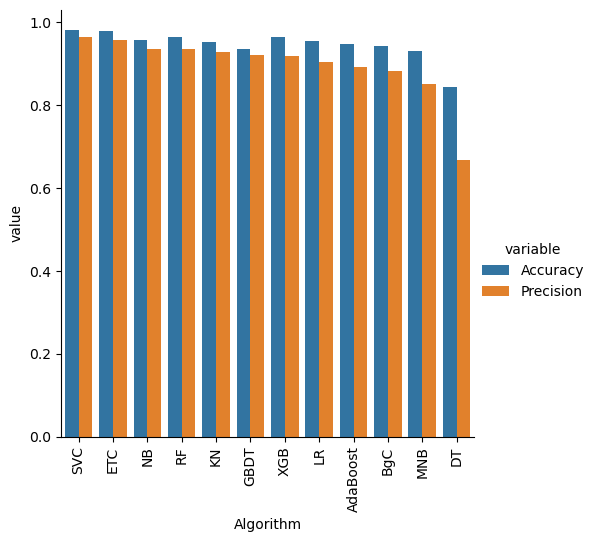

In [78]:
sns.catplot(x="Algorithm",y="value",
            hue='variable',data=performance_df1,kind='bar',
           height=5)
plt.ylim=(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [79]:
from sklearn.ensemble import VotingClassifier

In [80]:
voting=VotingClassifier(estimators=[('rf',rfc),('nb',gnb),('et',etc)],voting='soft')

In [81]:
voting.fit(X_train,Y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('nb', GaussianNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [82]:
Y_pred=voting.predict(X_test)
print("Accuracy",accuracy_score(Y_test,Y_pred))
print("Precision",precision_score(Y_test,Y_pred))

Accuracy 0.974974974974975
Precision 0.9540983606557377


In [83]:
#Applying Stack
estimators=[('rf',rfc),('nb',gnb),('et',etc)]
final_estimators=RandomForestClassifier()

In [84]:
from sklearn.ensemble import StackingClassifier

In [85]:
clf=StackingClassifier(estimators=estimators,final_estimator=final_estimators)

In [86]:
clf.fit(X_train,Y_train)
Y_pred=clf.predict(X_test)
print("Accuracy",accuracy_score(Y_test,Y_pred))
print("Precision",precision_score(Y_test,Y_pred))

Accuracy 0.96996996996997
Precision 0.9657534246575342


In [96]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(svc,open('model.pkl','wb'))